In [231]:
import os 

target_voice_path='/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/test data(final))/normal voice/5/'

target_voice_list=os.listdir(target_voice_path)

target_voice_list

['normal voice 5.wav']

In [232]:
import math
import time

start = time.time()

In [233]:
import pandas as pd  

target_audio=pd.DataFrame(index=range(1),columns=['mfcc'])

In [234]:
import librosa.display
import numpy as np  

sample_rate=8000

for i in range(target_audio.shape[0]):
    x=librosa.load(target_voice_path+target_voice_list[i])[0]
    S = librosa.feature.melspectrogram(y=x, sr=sample_rate, n_mels=200)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=30)
    n_mfcc = librosa.feature.delta(mfcc, order=2)
    
    target_audio.iloc[i,0]=n_mfcc

In [235]:
x_train=target_audio

In [236]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

In [237]:
max=39

In [238]:
x_train.iloc[0,0]=pad2d(x_train.iloc[0,0], max)

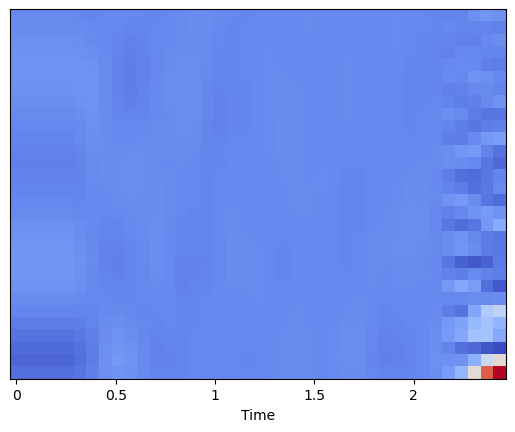

In [239]:
librosa.display.specshow(x_train.iloc[0,0], sr=8000, x_axis='time')

In [240]:
feature_list=[]
for i in range(len(x_train.iloc[0,0][0])):
    feature_list.append(i)
X_train=pd.DataFrame(index=range(x_train.shape[0]),columns=feature_list)

In [241]:
for i in range(x_train.shape[0]):
    for j in range(len(x_train.iloc[i,0])):
        for k in range(len(x_train.iloc[i,0][j])):
            X_train.iloc[i,k]=x_train.iloc[i,0][j][k]

In [242]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.09893,0.09893,0.09893,0.09893,0.09893,-0.06292,-0.15589,-0.041841,0.026007,-0.079891,...,0.068728,0.130851,0.045558,-0.041695,-0.152453,-0.231645,-0.259195,0.529554,0.934923,0.542456


In [243]:
x_train_scale=X_train

In [244]:
import tensorflow as tf

x_train = tf.convert_to_tensor(x_train_scale, dtype=tf.float32)

In [245]:
import tensorflow as tf 
from keras.models import load_model

model_path='/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/saved model(0523)/deep voice detection model(0523).keras'


deepvoice_classification_model = tf.keras.models.load_model(model_path)

deepvoice_classification_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 37, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 35, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 33, 8)          │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 16, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 16, 64)         │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 16, 32)         │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 16)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,949 (312.30 KB)

 Trainable params: 26,649 (104.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,300 (208.21 KB)

In [246]:
pred=deepvoice_classification_model.predict(x_train)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


array([[3.9384366e-05]], dtype=float32)

In [247]:
if pred>0.5:
    process_probability=pred*100
elif pred<0.5:
    process_probability=(1-pred)*100

In [248]:
deepvoice_detection_results = np.where(pred > 0.5, 1, 0)  

In [249]:
deepvoice_detection_results[0][0]

0

In [250]:
if deepvoice_detection_results == 0:
    print(f"{process_probability[0][0]:.2f}% 확률로 딥 보이스가 아닙니다.")
elif deepvoice_detection_results==1:
    print(f"{process_probability[0][0]:.2f}% 확률로 딥 보이스가 의심됩니다.")

100.00% 확률로 딥 보이스가 아닙니다.


In [251]:
import time

end = time.time()
print(f"{end - start:.5f} sec")

1.30301 sec
